In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
!pip install tensorflow

In [3]:
# Install the datasets library
!pip install datasets

In [4]:
# To load a dataset
from datasets import load_dataset

ds = load_dataset("yorius96/manga_book_classifier")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/96 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/96 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/32 [00:00<?, ? examples/s]

In [5]:
# Download the dataset
from datasets import load_dataset
import os
from sklearn.model_selection import train_test_split

# Load the manga book classifier dataset
dataset = load_dataset("yorius96/manga_book_classifier")

# Save images to directories
def save_images(dataset, split, folder):
    os.makedirs(folder, exist_ok=True)
    for i, example in enumerate(dataset[split]):
        image = example['image']
        label = example['label']
        label_folder = os.path.join(folder, str(label))
        os.makedirs(label_folder, exist_ok=True)
        image.save(os.path.join(label_folder, f'image_{i}.jpg'))

# Access the splits using the correct keys ('train' and 'test' for this dataset)
save_images(dataset, 'train', 'manga_book_dataset/train') # Ensure split key is 'train'
save_images(dataset, 'test', 'manga_book_dataset/test')  # Ensure split key is 'test'

# Create validation set from training set
def split_train_data(train_dir, val_split=0.2):
    for label in os.listdir(train_dir):
        label_dir = os.path.join(train_dir, label)
        images = os.listdir(label_dir)
        train_images, val_images = train_test_split(images, test_size=val_split, random_state=42)

        # Create validation directory
        val_label_dir = os.path.join('manga_book_dataset/valid', label)
        os.makedirs(val_label_dir, exist_ok=True)

        # Move images to validation directory
        for image in val_images:
            os.rename(os.path.join(label_dir, image), os.path.join(val_label_dir, image))

# Split the training data into train/validation
split_train_data('manga_book_dataset/train')

# Update directories
train_dir = 'manga_book_dataset/train/'
valid_dir = 'manga_book_dataset/valid/'
test_dir = 'manga_book_dataset/test/'


Resolving data files:   0%|          | 0/96 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
PATH = 'manga_book_dataset/' ## Specify your path here...
train_dataset = image_dataset_from_directory(
 PATH + "train", # Removed extra "train"
 image_size=(180, 180),
 batch_size=32)

validation_dataset = image_dataset_from_directory(
 PATH + "valid", # Changed "validation" to "valid" to match directory name
 image_size=(180, 180),
 batch_size=32)


Found 76 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


In [8]:
# Print class names
class_names = train_dataset.class_names
print("Class Names:", class_names)

# Optionally, you can also print the number of classes
print("Number of Classes:", len(class_names))

Class Names: ['0', '1']
Number of Classes: 2


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [16]:
# Assuming these are the classes; update based on actual labels
class_names = {
    'Libros': 0,
    'Mangás': 1 # Assuming these are the classes; update based on actual labels
}


In [11]:
# Function to load dataset with custom labels
def load_dataset(directory, image_size=(180, 180), batch_size=32):
    dataset = image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size,
        labels='inferred',  # Automatically infer labels from the folder structure
        label_mode='int'  # Integer labels
    )

    # Custom label mapping
    def map_labels(image, label):
        # Convert label from integer to custom label
        custom_label = tf.cast(tf.gather(tf.constant(list(class_names.values())), label), tf.int32)
        return image, custom_label

    dataset = dataset.map(map_labels)
    return dataset


In [14]:

# Load datasets (ensure these directories are correct)
train_dataset = load_dataset('manga_book_dataset/train/')
validation_dataset = load_dataset('manga_book_dataset/valid/')
test_dataset = load_dataset('manga_book_dataset/test/')

# Print class names and their labels
print("Class Names and their Labels:")
for class_name, label in class_names.items():
    print(f"{class_name}: {label}")

# Optionally, you can print the number of classes
print("Number of Classes:", len(class_names))

Found 76 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Found 32 files belonging to 2 classes.
Class Names and their Labels:
Livros: 0
Mangás: 1
Number of Classes: 2


In [15]:
# Load datasets
#train_dataset = load_dataset(dataset['train'])
#validation_dataset = load_dataset(dataset['test']) # The original dataset only has train and test splits

# Print class names and their labels
print("Class Names and their Labels:")
for class_name, label in class_names.items():
    print(f"{class_name}: {label}")

# Optionally, you can print the number of classes
print("Number of Classes:", len(class_names))

Class Names and their Labels:
Livros: 0
Mangás: 1
Number of Classes: 2


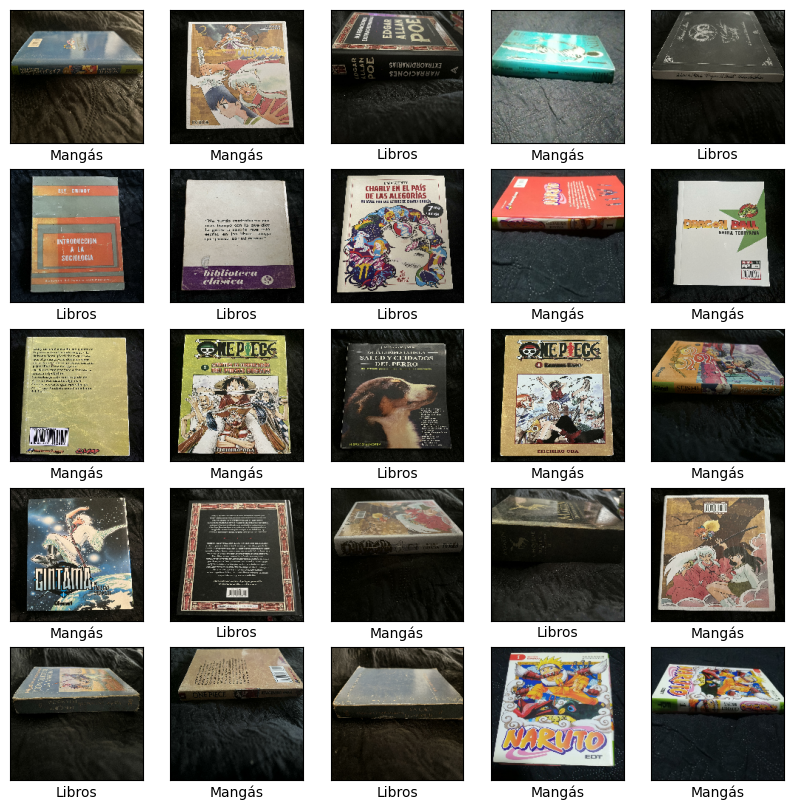

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Assuming these are the classes; update based on actual labels
class_names = {
    'Libros': 0,
    'Mangás': 1
}

plt.figure(figsize=(10, 10))
# Iterate over the dataset and take only the first 25 images and labels
for images, labels in train_dataset.take(1):  # Take only one batch
    num_images = min(25, images.shape[0])  # Limit the number of images to 25
    for i in range(num_images):  # Iterate over the first 25 images only
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # Display the image
        plt.imshow(images[i].numpy().astype("uint8"))
        # Convert the label tensor to a NumPy integer
        label_index = labels[i].numpy()
        # Use the integer index to access the class name
        plt.xlabel(list(class_names.keys())[list(class_names.values()).index(label_index)])
plt.show()


In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models # Import the models module

# Model building using Functional API
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    #layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [47]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │         204,804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,052 (1.14 MB)

 Trainable params: 298,052 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2712 - loss: 1.1246 - val_accuracy: 0.5000 - val_loss: 1.7436
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4161 - loss: 1.4101 - val_accuracy: 0.5000 - val_loss: 0.7902
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4883 - loss: 0.7805 - val_accuracy: 0.5000 - val_loss: 0.7205
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5866 - loss: 0.6981 - val_accuracy: 0.5500 - val_loss: 0.7127
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5604 - loss: 0.6625 - val_accuracy: 0.7500 - val_loss: 0.6460
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7932 - loss: 0.5840 - val_accuracy: 0.6500 - val_loss: 0.6379
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7329 - loss: 0.5418 - val_accuracy: 0.6500 - val_loss: 0.6210
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7956 - loss: 0.4797 - val_accuracy: 0.6500 - val_loss: 0.6397
Epoch 9/10
3/3 

In [50]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7812 - loss: 0.5537
Test accuracy: 0.781
